In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import bomi

In [119]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Initial board analysis and filtering

In [120]:
import os

all = []
for file in os.listdir("CSVs-completos"):
    df = pd.read_csv(f"CSVs-completos/{file}", index_col=0, parse_dates=["date"], low_memory=False)
    info = bomi.log_info(df)
    

    info['name'] = file
    all.append(info)

result = pd.DataFrame.from_records(pd.json_normalize(all))
result['board_duration'] = (result['ends'] - result['start'])
result.head(10)


,events,attribs,cards,lists,list_first_create,list_last_create,list_renamed,list_closed,start,ends,board_duration,first_event_type,members,card_members_assigned,card_checklists,card_movement,card_closed,card_deleted,card_due,cards_moving_perc,cards_checklist_perc,cards_assigned_perc,cards_closed_perc,name,events_per_member.count,events_per_member.mean,events_per_member.std,events_per_member.min,events_per_member.25%,events_per_member.50%,events_per_member.75%,events_per_member.max
0,81,60,27,6,2021-06-14 12:44:10.078,2021-06-14 12:46:09.995,6,0,2021-06-14 12:43:56.409,2021-12-15 21:40:01.708,184 days 08:56:05.299000,createBoard,8,1,0,1,8,0,0,0.037037,0.000000,0.037037,0.296296,Merseyside Fire & Rescue Training and Educatio...,8.0,10.125000,23.805387,1.0,1.0,1.5,3.00,69.0
1,406,63,22,4,2020-03-13 15:11:57.480,2020-03-13 18:59:19.085,0,0,2020-03-13 15:11:57.244,2020-12-14 08:25:17.625,275 days 17:13:20.381000,createBoard,2,147,1,11,0,1,0,0.409091,0.045455,0.272727,0.000000,speleo.se.csv,2.0,203.000000,203.646753,59.0,131.0,203.0,275.00,347.0
2,354,82,125,3,NaT,NaT,0,0,2015-12-08 07:33:46.311,2021-11-07 04:34:09.882,2160 days 21:00:23.571000,copyCommentCard,17,1,0,2,0,10,0,0.008000,0.000000,0.008000,0.000000,浙江任务.csv,17.0,20.823529,48.923710,1.0,1.0,1.0,2.00,164.0
3,89,48,28,5,2021-10-18 08:11:46.005,2021-11-24 18:50:58.565,0,0,2021-10-18 08:11:37.087,2022-01-11 22:16:29.013,85 days 14:04:51.926000,createBoard,3,0,1,18,2,0,0,0.464286,0.035714,0.000000,0.071429,Iishee orooroi.csv,3.0,29.666667,21.939310,5.0,21.0,37.0,42.00,47.0
4,48905,103,8847,686,2020-05-14 00:23:03.192,2022-03-02 05:01:58.050,213,856,2020-05-13 23:55:03.489,2022-03-02 12:14:56.338,657 days 12:19:52.849000,createBoard,193,63,10,10026,114,89,11,0.778456,0.000904,0.004973,0.012886,Session Board.csv,193.0,253.393782,616.934112,1.0,12.0,43.0,203.00,4939.0
5,428,76,85,23,2021-06-18 08:32:43.413,2021-06-30 06:59:56.545,30,14,2021-06-18 08:31:56.467,2021-07-22 06:43:07.884,33 days 22:11:11.417000,createBoard,1,0,0,5,2,22,5,0.047059,0.000000,0.000000,0.023529,Kenobisboch.csv,1.0,428.000000,NaN,428.0,428.0,428.0,428.00,428.0
6,101,50,18,4,2021-06-19 04:50:58.956,2021-08-27 05:23:22.425,3,0,2021-06-19 04:49:38.125,2021-12-06 04:03:54.781,169 days 23:14:16.656000,createBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,Trisciatha.csv,1.0,101.000000,NaN,101.0,101.0,101.0,101.00,101.0
7,61,28,24,6,2015-01-19 19:17:44.720,2015-01-19 19:18:24.562,0,0,2015-01-19 19:16:51.749,2015-02-03 05:57:05.884,14 days 10:40:14.135000,createBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,OKRs.csv,1.0,61.000000,NaN,61.0,61.0,61.0,61.00,61.0
8,397,45,149,39,2021-12-25 02:43:56.049,2022-01-01 22:13:08.636,12,19,2021-12-25 02:35:58.555,2022-01-22 16:17:46.435,28 days 13:41:47.880000,createBoard,1,0,0,0,5,0,0,0.000000,0.000000,0.000000,0.033557,Deepwoken.csv,1.0,397.000000,NaN,397.0,397.0,397.0,397.00,397.0
9,3855,120,393,18,2021-06-08 12:08:21.427,2022-02-14 13:43:53.549,3,11,2021-04-02 22:49:02.742,2022-02-25 13:06:25.526,328 days 14:17:22.784000,createBoard,26,37,16,221,120,26,26,0.348601,0.025445,0.076336,0.305344,Navy Seals.csv,26.0,148.269231,256.326442,1.0,3.0,48.0,147.25,1011.0


In [121]:
# The first event of the boards. 
result["first_event_type"].value_counts()

createBoard        488
copyBoard           91
createCard          20
copyCommentCard     12
updateCard           3
commentCard          1
addMemberToCard      1
Name: first_event_type, dtype: int64

We will discard all of those that do not start with createBoard. The others might have had problems when they were extracted or they were copied from a previously created board and, in that case, we will be missing information

In [122]:
result_f = result[result["first_event_type"]=="createBoard"]

Now, we analyze the distributions of events, cards and lists to get an idea of how the collection of boards look like

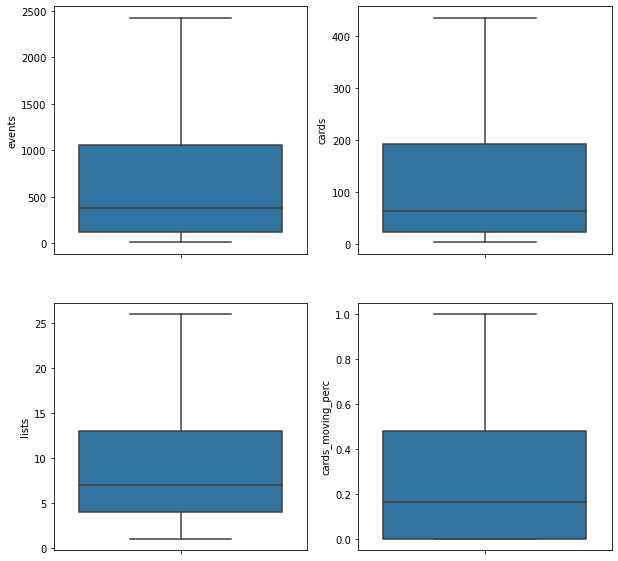

In [123]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

axf = ax.flatten()
for i, at in enumerate(['events', 'cards', 'lists', 'cards_moving_perc']):
    sns.boxplot(y=at, data=result_f, showfliers=False, ax=axf[i])


In [124]:
result_f[["events", "cards", "lists", "cards_moving_perc", "cards_closed_perc"]].describe()

,events,cards,lists,cards_moving_perc,cards_closed_perc
count,488.000000,488.000000,488.000000,488.000000,488.000000
mean,1560.909836,215.127049,12.633197,0.271170,0.124358
std,6086.940249,743.618825,35.351603,0.291105,0.188189
min,11.000000,4.000000,1.000000,0.000000,0.000000
25%,118.500000,24.000000,4.000000,0.000000,0.000000
50%,377.000000,63.500000,7.000000,0.164966,0.042471
75%,1059.500000,192.250000,13.000000,0.479663,0.166667
max,103250.000000,10809.000000,686.000000,1.000000,0.928315


Let's filter only those that have had a minimum use. We determine that based on the board lifetime and the number of events

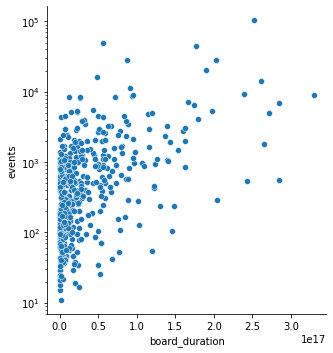

In [125]:
g = sns.relplot(x='board_duration', y='events', data=result_f)
g.set(yscale="log")

In our analysis, we will select only those boards that have had more than 2000 events and has been used for more than 12 weeks.

In [126]:
selected = result_f[(result_f['events'] > 2000)  & ((result_f['ends'] - result_f['start']) > pd.Timedelta('12W'))]
selected.shape

(63, 32)

In [127]:
selected["name"].values

array(['Session Board.csv', 'Navy Seals.csv',
       'Subnautica Development.csv', 'DevDocs Documentation.csv',
       'Rogue Lineage.csv', 'Tatakai.csv', 'a.csv', 'lovedrop lake.csv',
       'treachery.online.csv', 'Teardown Tracker.csv',
       '[MG] Mediziner.csv', 'Deisim Development.csv',
       'Project Aincrad.csv', 'Skin Approval.csv', 'Last Pirates .csv',
       'Resurgence.csv', "Rikudou's Addons.csv", 'VH3.csv',
       'Wayward Todo.csv', 'HKSTP TalentConnect.csv',
       'An Uprising Trello.csv', 'PnP.csv', '近期待辦事項.csv', 'Lishting.csv',
       'Software Inc..csv', 'Aeronautica (Discontinued Trello).csv',
       'GTA Colors.csv', 'RPG Resources.csv', 'VulgarLang.csv',
       '(Antigo)PokeZWorld.csv', 'Oeagag Trello.csv', 'Animes.csv',
       'SoulShatters.csv', 'Studiocart Roadmap.csv', 'Content Team.csv',
       'Inbox.csv', 'Territory Helper.csv', '#BergShelterPets.csv',
       'Svnnydraw.csv', 'Divine.csv', 'R2CK.csv', 'Supa VAM.csv',
       'Elation.csv', 'SEEL 2021-II (

In [128]:
# Use this for additional filters
#sel = selected[selected["cards_moving_perc"] >0.6]
sel = selected
sel.shape

(63, 32)

# Detailed board analysis

Now, we will analyze in detail the selected boards

In [129]:
all = []
for file in sel["name"]:
    df = pd.read_csv(f"CSVs-completos/{file}", index_col=0, parse_dates=["date"], low_memory=False)
    bomi.enrich_log(df)
    redesigns = bomi.detect_redesign(df, pd.Timedelta('1D'), threshold_l_events=4)
    
    info = bomi.static_metrics(df, redesigns.head(20), event_threshold=20)

    info['name'] = file
    all.append(info.reset_index())

detailed = pd.concat(all).reset_index(drop=True)

detailed.head(5)

,index,events,cards,lists,list_num_components,list_connected_size_mean,list_connected_size_mean_perc,list_num_components_move,move_per_list_with_move,list_with_move_perc,cards_moving_perc,moves_per_moving_card,act_per_list,cards_act_perc,act_per_act_card,cards_closed_perc,name
0,"(2022-02-23 11:25:30.433000, 2022-02-26 03:11:...",65.0,28.0,6.0,6.0,1.0,0.166667,0.0,NaN,0.000000,0.00,NaN,7.6,1.000000,1.357143,0.0,Session Board.csv
1,"(2022-02-15 03:41:35.123000, 2022-02-18 05:40:...",70.0,29.0,6.0,6.0,1.0,0.166667,0.0,NaN,0.000000,0.00,NaN,9.6,0.965517,1.714286,0.0,Session Board.csv
2,"(2022-02-08 23:29:49.882000, 2022-02-12 10:23:...",65.0,30.0,6.0,6.0,1.0,0.166667,0.0,NaN,0.000000,0.00,NaN,8.4,1.000000,1.400000,0.0,Session Board.csv
3,"(2022-02-04 19:33:30.243000, 2022-02-07 23:31:...",91.0,36.0,6.0,5.0,1.2,0.200000,1.0,9.0,0.333333,0.25,1.0,11.8,1.000000,1.638889,0.0,Session Board.csv
4,"(2022-01-27 04:09:54.661000, 2022-01-30 17:01:...",52.0,28.0,6.0,6.0,1.0,0.166667,0.0,NaN,0.000000,0.00,NaN,8.0,1.000000,1.428571,0.0,Session Board.csv


In [45]:
detailed.to_excel("detailed.xlsx")

The rest of the analysis is performed in the Excel file itself. In particular, the output generated in this notebook was extended with manually processed information about the design pattern used in each of the boards